In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import json


In [40]:
data = pd.read_csv("data/train.zip")

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114933 entries, 0 to 114932
Data columns (total 27 columns):
id                        114933 non-null int64
photo                     114933 non-null object
name                      114931 non-null object
blurb                     114927 non-null object
goal                      114933 non-null float64
slug                      114933 non-null object
disable_communication     114933 non-null bool
country                   114933 non-null object
currency                  114933 non-null object
currency_symbol           114933 non-null object
currency_trailing_code    114933 non-null bool
deadline                  114933 non-null int64
state_changed_at          114933 non-null int64
created_at                114933 non-null int64
launched_at               114933 non-null int64
static_usd_rate           114933 non-null float64
creator                   114933 non-null object
location                  114441 non-null object
category      

In [53]:
data.head()

,id,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,...,location,category,profile,urls,source_url,friends,is_starred,is_backing,permissions,state
0,663816109,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Angular - Where Modern Art meets Cards,Angular is a minimalist card design for simpli...,17380.0,angular-where-modern-art-meets-cards,False,US,USD,$,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed
1,1462931821,"{""small"":""https://ksr-ugc.imgix.net/assets/014...",Ladybeard is KAWAII-CORE,Original songs and music videos to jump start ...,24000.0,ladybeard-is-kawaii-core,False,US,USD,$,...,"{""country"":""JP"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed
2,1724358498,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Vegan Cafe Delivery Service in Vancouver BC,Our project is to launch a vegan lunch deliver...,40000.0,vegancafeca,False,CA,CAD,$,...,"{""country"":""CA"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed
3,314918941,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Photoetched Rail Yard Exposition,I have developed a process of my own which tra...,1000.0,photoetched-rail-yard-exposition,False,US,USD,$,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,successful
4,1766165140,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Cinnamon Fletcher needs to be brought to life!,Need to pay an illustrator to bring my childre...,700.0,cinnamon-fletcher-needs-to-be-brought-to-life,False,GB,GBP,Â£,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed


In [24]:
data['category'][0]

'{"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/games/playing%20cards"}},"color":51627,"parent_id":12,"name":"Playing Cards","id":273,"position":4,"slug":"games/playing cards"}'

In [37]:
data.isnull().sum()

id                             0
photo                          0
name                           2
blurb                          6
goal                           0
slug                           0
disable_communication          0
country                        0
currency                       0
currency_symbol                0
currency_trailing_code         0
deadline                       0
state_changed_at               0
created_at                     0
launched_at                    0
static_usd_rate                0
creator                        0
location                     492
category                       0
profile                        0
urls                           0
source_url                     0
friends                   114828
is_starred                114828
is_backing                114828
permissions               114828
state                          0
dtype: int64

In [53]:
data["country"].value_counts()

US    93028
GB     9531
CA     4204
AU     2136
DE      950
NL      692
IT      647
FR      646
ES      521
SE      510
NZ      410
MX      347
DK      301
NO      206
IE      205
BE      159
CH      153
AT      114
SG       85
HK       73
LU       15
Name: country, dtype: int64

In [53]:
# convert to usd
data['goal_usd'] = data['goal']*data['static_usd_rate']

# remove outlier
Q1 = np.percentile(data['goal_usd'],25)
Q3 = np.percentile(data['goal_usd'],75)
IQR = Q3 - Q1
data_filtered = data[~((data['goal_usd']< (Q1 - 1.5 * IQR)) |(data['goal_usd'] > (Q3 + 1.5 * IQR)))]
#sns.distplot(data_filtered['goal_usd'])

# category json 
data_filtered['slug_from_category'] = data_filtered.apply(lambda x: json.loads(x.category)['slug'], axis=1)
data_filtered['project_category'] = data_filtered['slug_from_category'].str.split(pat='/').str[0]
data_filtered['sub_category'] = data_filtered['slug_from_category'].str.split(pat='/').str[1]

# duration
data_filtered['deadline'] = pd.to_datetime(data_filtered['deadline'], unit='s')
data_filtered['launched_at'] = pd.to_datetime(data_filtered['launched_at'], unit='s')
data_filtered['duration'] = abs(data_filtered['deadline'] - data_filtered['launched_at']).dt.days

# country,project_category,sub_category encode
#from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_filtered['country_encoded'] = le.fit_transform(data_filtered['country'])
data_filtered['project_category_encoded'] = le.fit_transform(data_filtered['project_category'])
data_filtered['sub_category_encoded'] = le.fit_transform(data_filtered['sub_category'])

# data normalisation 
from sklearn.preprocessing import StandardScaler
## Initialise the scaler
scaler = StandardScaler() 
# Apply auto-scaling (or any other type of scaling) and cast to DataFrame
data_filtered_pre_scale = data_filtered[['goal_usd','duration']]
data_filtered_after_scale = pd.DataFrame(
                    scaler.fit_transform(data_filtered_pre_scale), 
                    columns = data_filtered_pre_scale.columns, 
                    index = data_filtered_pre_scale.index)

# create X
data_partial = pd.concat([data_filtered_after_scale,data_filtered[['country_encoded','project_category_encoded','sub_category_encoded']]],axis=1)

#create Y
state = data_filtered["state"].apply(lambda x: 1 if x == "successful" else 0)

# split train and test
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_partial,state, 
                                                    test_size=0.3, random_state=101,
                                                    stratify=state)

# create parameter dictionary, CV parameters cannot be list
n_neighb = np.arange(1, 51, 5)  
parameters = [{'n_neighbors': n_neighb}] 

gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)
gridCV.fit(X_train, y_train) 
bestNeighb = gridCV.best_params_['n_neighbors']
#print("Best parameters: n_neighbours=", bestNeighb)
#pd.DataFrame(gridCV.cv_results_)
#plt.plot(np.arange(1, 51, 5), gridCV.cv_results_['mean_test_score'])

knn = KNeighborsClassifier(n_neighbors=bestNeighb)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


"""
def plot_train_test_accuracy(k, train_accuracy, test_accuracy):
    plt.figure(figsize=(8, 6))
    
    plt.plot(k, train_accuracy, linewidth=2.0, color='r', label="Train Accuracy")
    plt.plot(k, test_accuracy, linewidth=2.0, color='b', label="Test Accuracy")
    
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.legend(loc='upper right')
    plt.show()

# + Create two empty lists for train and test accuracy then iterate over a list of k values
train_accuracy = []
test_accuracy = []

parameters = np.arange(0,50,5)

for k in parameters:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
    
plot_train_test_accuracy(parameters, train_accuracy, test_accuracy)
"""

C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads03\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads03\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads03\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

0.7007368905849068


'\ndef plot_train_test_accuracy(k, train_accuracy, test_accuracy):\n    plt.figure(figsize=(8, 6))\n    \n    plt.plot(k, train_accuracy, linewidth=2.0, color=\'r\', label="Train Accuracy")\n    plt.plot(k, test_accuracy, linewidth=2.0, color=\'b\', label="Test Accuracy")\n    \n    plt.xlabel("k")\n    plt.ylabel("Accuracy")\n    plt.legend(loc=\'upper right\')\n    plt.show()\n\n# + Create two empty lists for train and test accuracy then iterate over a list of k values\ntrain_accuracy = []\ntest_accuracy = []\n\nparameters = np.arange(0,50,5)\n\nfor k in parameters:\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train, y_train)\n    train_accuracy.append(knn.score(X_train,y_train))\n    test_accuracy.append(knn.score(X_test,y_test))\n    \nplot_train_test_accuracy(parameters, train_accuracy, test_accuracy)\n'

In [8]:
state = data["state"].apply(lambda x: 1 if x == "successful" else 0)

In [30]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_partial,state, 
                                                    test_size=0.3, random_state=101,
                                                    stratify=state)
#train_set, test_set = train_test_split(data,test_size=0.3, random_state=101)

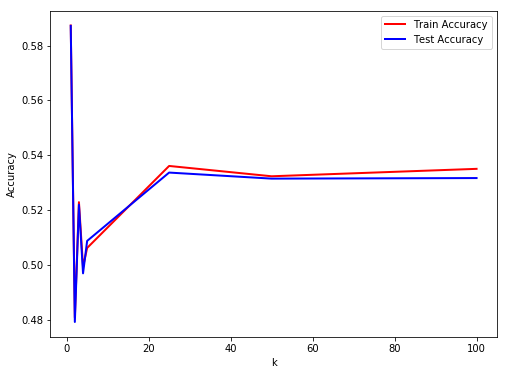

In [31]:
def plot_train_test_accuracy(k, train_accuracy, test_accuracy):
    plt.figure(figsize=(8, 6))
    
    plt.plot(k, train_accuracy, linewidth=2.0, color='r', label="Train Accuracy")
    plt.plot(k, test_accuracy, linewidth=2.0, color='b', label="Test Accuracy")
    
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.legend(loc='upper right')
    plt.show()

# + Create two empty lists for train and test accuracy then iterate over a list of k values
train_accuracy = []
test_accuracy = []

parameters = np.arange(0,50,5)

for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_partial,state)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
    
plot_train_test_accuracy(parameters, train_accuracy, test_accuracy)
